## Chapter8

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import (ensemble, preprocessing, tree)
from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import (train_test_split, StratifiedKFold)
from yellowbrick.classifier import(ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve)
from utils import get_train_test_X_y, tweak_titanic

## Feature Selection

- Use feature selection to select features that are useful to the model
- Irrelevant features may have negative effect on a model
- Correlated features can make coefficients in regression (or feature importance in tree models) unstable or difficult to interpret

- Also need to reduce the dimension of the problem
- More features to consider leads to more sparse data
- Difficult to do neighbor calculations as they are less useful the more dimensions that are added

- Training time is a function of the number of columns - so we need to be concise and precise with out models

In [87]:
url = ("titanic3.xls")
df = pd.read_excel(url)
orig_df = df
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [88]:
ti_df = tweak_titanic(orig_df)

In [89]:
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(ti_df, "survived", std_cols=std_cols)

In [63]:
agg = (df.groupby("cabin").agg("min,max,mean,sum".split(",")).reset_index())

In [64]:
agg.columns = ["_".join(c).strip("_") for c in agg.columns.values]

In [65]:
agg.columns


Index(['cabin', 'pclass_min', 'pclass_max', 'pclass_mean', 'pclass_sum',
       'survived_min', 'survived_max', 'survived_mean', 'survived_sum',
       'age_min', 'age_max', 'age_mean', 'age_sum', 'sibsp_min', 'sibsp_max',
       'sibsp_mean', 'sibsp_sum', 'parch_min', 'parch_max', 'parch_mean',
       'parch_sum', 'fare_min', 'fare_max', 'fare_mean', 'fare_sum',
       'body_min', 'body_max', 'body_mean', 'body_sum'],
      dtype='object')

In [66]:
agg_df = df.merge(agg, on="cabin")

## Collinear Columns
- Find columns that have a correlation coefficient of 0.95 and above

In [67]:
threshold = 0.95
corr = agg_df.corr()
mask = np.triu(np.ones(corr.shape),k=1).astype(bool)
corr_no_diag = corr.where(mask)
coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > threshold)]

In [68]:
coll

['pclass_min',
 'pclass_max',
 'pclass_mean',
 'sibsp_mean',
 'parch_mean',
 'fare_mean',
 'body_min',
 'body_max',
 'body_mean',
 'body_sum']

## RFPIMP Package
A library that provides feature importances, based upon the permutation importance strategy, for general scikit-learn models and implementations specifically for random forest out-of-bag scores
https://explained.ai/rf-importance/index.html

In [69]:
import rfpimp

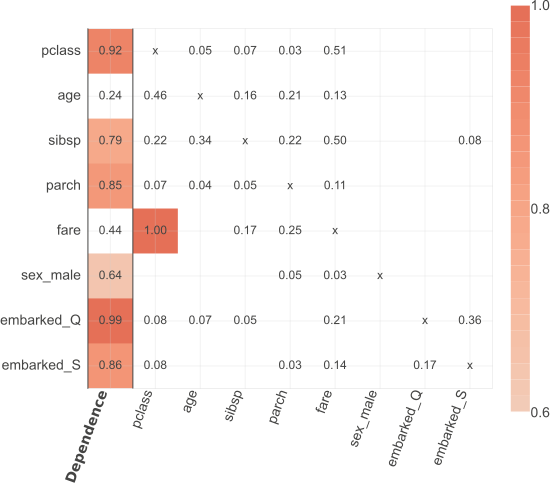

In [90]:
rfpimp.plot_dependence_heatmap(rfpimp.feature_dependence_matrix(X_train),value_fontsize=12,label_fontsize=14,figsize=(8, 8))


In [71]:
cols_to_remove = ["pclass", "sibsp", "parch", "embarked_Q"]

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train[[c for c in X_train.columns if c not in cols_to_remove]],y_train)
#

RandomForestClassifier(random_state=42)

In [85]:
rf3.score(X_test[[c for c in X_train.columns if c not in cols_to_remove]], y_test)

0.7582697201017812

In [91]:
rf4 = RandomForestClassifier(random_state=42)
rf4.fit(X_train, y_train)
rf4.score(X_test, y_test)

0.7938931297709924